In [1]:
#Import
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import tensorflow as tf
import tensorflow.keras.layers as KL
from sklearn.preprocessing import MinMaxScaler

In [2]:
## Dataset
mnist = tf.keras.datasets.mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
#print(x_train.shape)
#reduce scale to 0 - 1
#scaler = MinMaxScaler(feature_range=(0,1))
#x_train = scaler.fit_transform(x_train)
#x_test = scaler.fit_transform(x_test)
x_train, x_test = x_train/255.0, x_test/255.0

In [7]:
print(y_train)

[5 0 4 ... 5 6 8]


In [5]:
## Model
inputs = KL.Input(shape=(28, 28))
print(inputs)

Tensor("input_1:0", shape=(None, 28, 28), dtype=float32)


In [6]:
# For RNN
x = KL.SimpleRNN(64, activation ='relu')(inputs) 
print(x)

Tensor("simple_rnn/strided_slice_3:0", shape=(None, 64), dtype=float32)


In [7]:
outputs = KL.Dense(10, activation="softmax")(x)
print(outputs)

Tensor("dense/Softmax:0", shape=(None, 10), dtype=float32)


In [8]:
model = tf.keras.models.Model(inputs, outputs)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 64)                5952      
_________________________________________________________________
dense (Dense)                (None, 10)                650       
Total params: 6,602
Trainable params: 6,602
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer="adam",
                loss="sparse_categorical_crossentropy",
                metrics=["acc"])
model.fit(x_train, y_train, epochs=5)
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Loss: {0} - Acc: {1}".format(test_loss, test_acc))

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5448 - acc: 0.8244
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2631 - acc: 0.9234
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2150 - acc: 0.9368
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1951 - acc: 0.9428
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.1555 - acc: 0.9535
Loss: 0.15546442568302155 - Acc: 0.953499972820282


(10000, 10)
4


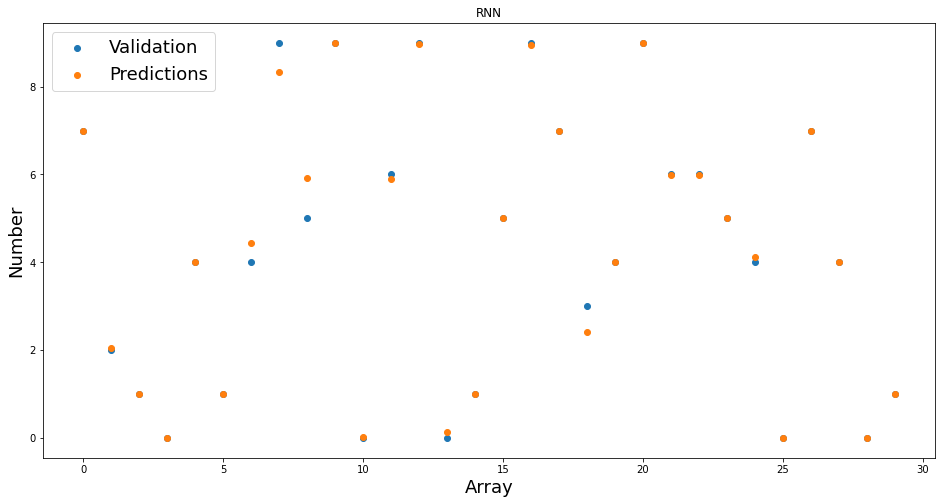

In [86]:
predictions = model.predict(x_test)
print(predictions.shape)
#predictions = scaler.inverse_transform(predictions)
print(y_test[4])
#print(predictions[10])

pred=[]

for i in range (0,len(predictions)):
    for j in range (0,10):
        predictions[i][j] = j*(predictions[i][j])        
    pred.append(sum(predictions[i]))  


#visualize the data
plt.figure(figsize = (16,8))
plt.title('RNN')
plt.xlabel('Array', fontsize = 18)
plt.ylabel('Number', fontsize = 18)
plt.scatter(range(30),y_test[0:30])
plt.scatter(range(30),pred[0:30])
#plt.plot(pred[:30])
plt.legend(['Validation', 'Predictions'], loc='upper left', fontsize = 18)
plt.show()